In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [34]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 24000 files belonging to 38 classes.
Using 19200 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'valid',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6000 files belonging to 38 classes.
Using 1200 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

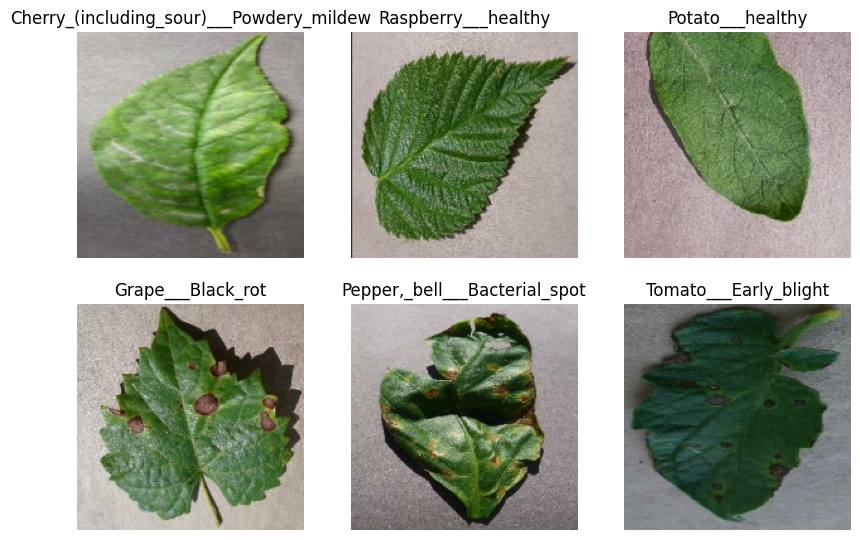

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [17]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=38,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(38, activation='softmax'))
     

In [18]:
resnet_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,656,294 (94.06 MB)

 Trainable params: 1,068,582 (4.08 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [20]:
from tensorflow.keras.optimizers import Adam

In [22]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [27]:
for x, y in train_ds.take(1):
    print(f"Input shape: {x.shape}")
    print(f"Label shape: {y.shape}")


Input shape: (32, 180, 180, 3)
Label shape: (32,)


In [29]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3705s 6s/step - accuracy: 0.7558 - loss: 0.9090 - val_accuracy: 0.9267 - val_loss: 0.2282
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3580s 6s/step - accuracy: 0.9419 - loss: 0.1749 - val_accuracy: 0.9300 - val_loss: 0.1871
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3563s 6s/step - accuracy: 0.9635 - loss: 0.1082 - val_accuracy: 0.9608 - val_loss: 0.1373
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3783s 6s/step - accuracy: 0.9725 - loss: 0.0880 - val_accuracy: 0.9408 - val_loss: 0.2047
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3505s 6s/step - accuracy: 0.9794 - loss: 0.0589 - val_accuracy: 0.9417 - val_loss: 0.1927
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4008s 7s/step - accuracy: 0.9801 - loss: 0.0598 - val_accuracy: 0.9500 - val_loss: 0.1544
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4028s 7s/step - accuracy: 0.9815 - loss: 0.0552 - val_accuracy: 0.9483 - val_loss: 0.1599
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2998s 5s/step - accuracy: 0.9798 - loss: 0.0653 - 

In [30]:
#Training set Accuracy
train_loss, train_acc = resnet_model.evaluate(train_ds)
print('Training accuracy:', train_acc)

600/600 ━━━━━━━━━━━━━━━━━━━━ 3780s 6s/step - accuracy: 0.9858 - loss: 0.0427
Training accuracy: 0.9879687428474426


In [31]:
#Validation set Accuracy
val_loss, val_acc = resnet_model.evaluate(val_ds)
print('Validation accuracy:', val_acc)

38/38 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.9494 - loss: 0.1917
Validation accuracy: 0.95333331823349


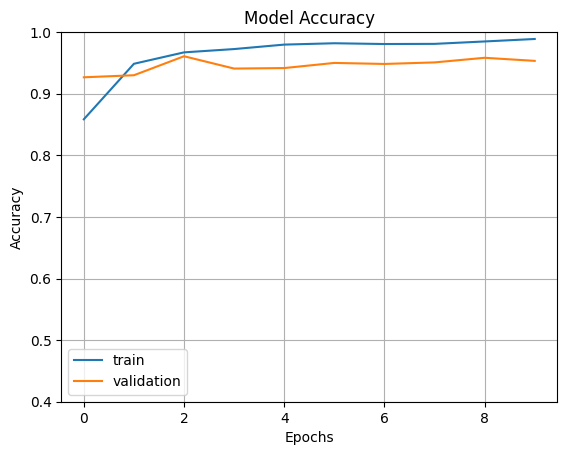

In [32]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

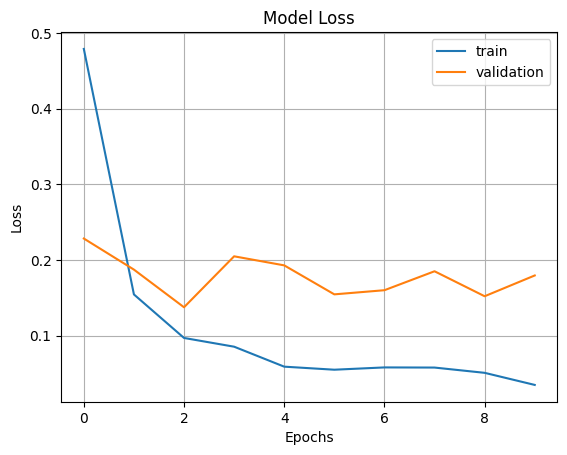

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6000 files belonging to 38 classes.
